In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# To plot the graphs inline
%matplotlib inline

In [2]:
df = pd.read_csv('Life expectancy.csv')

In [3]:
countries = ["United Kingdom", "Canada", "Japan", "United States", "Italy"]
df_filtered = df[df.Entity.isin(countries)]

In [4]:
df_filtered

,Entity,Year,Life expectancy
432,Canada,1800,39.000000
433,Canada,1801,39.001495
434,Canada,1802,39.002995
435,Canada,1803,39.004490
436,Canada,1804,39.005985
...,...,...,...
3248,United States,2012,78.940002
3249,United States,2013,78.959999
3250,United States,2014,78.940002
3251,United States,2015,78.870003


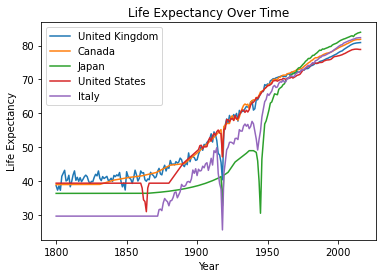

In [5]:
for country in countries:
    country_data = df[df['Entity'] == country]
    plt.plot(country_data['Year'], country_data['Life expectancy'])
plt.legend(countries)
plt.title('Life Expectancy Over Time')
plt.xlabel('Year')
plt.ylabel('Life Expectancy')
plt.show()

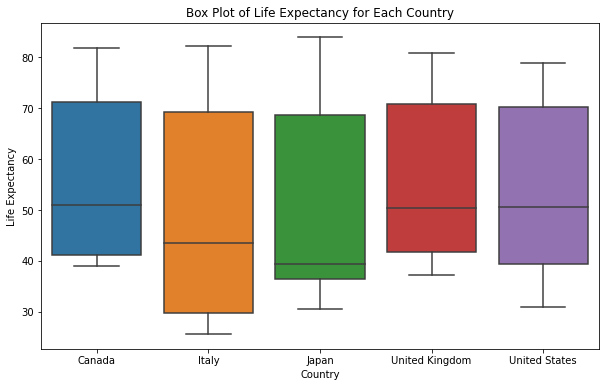

In [6]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Entity', y='Life expectancy', data=df_filtered)
plt.title('Box Plot of Life Expectancy for Each Country')
plt.xlabel('Country')
plt.ylabel('Life Expectancy')
plt.show()

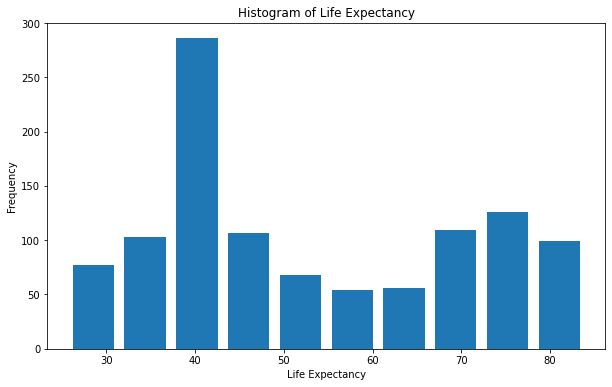

In [7]:
plt.figure(figsize=(10,6))
df_filtered['Life expectancy'].plot(kind='hist', rwidth=0.8)
plt.title('Histogram of Life Expectancy')
plt.xlabel('Life Expectancy')
plt.show()

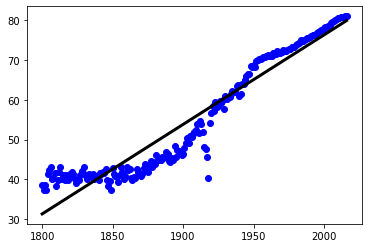

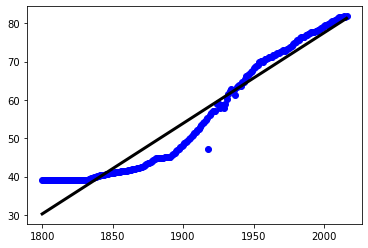

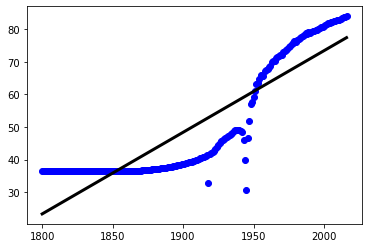

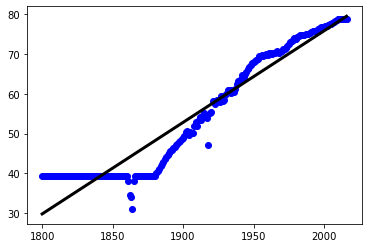

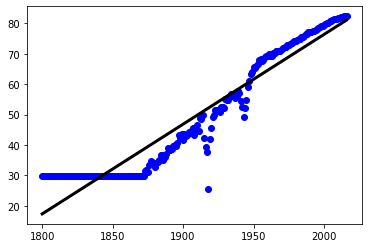


Country:  United Kingdom
MSE: 24.323122064077154
RMSE: 4.931847733261557
R^2 Score: 0.8827716192315546

Country:  Canada
MSE: 14.286260469310202
RMSE: 3.779716982699922
R^2 Score: 0.9355045059603091

Country:  Japan
MSE: 75.3922238663403
RMSE: 8.682869564051984
R^2 Score: 0.7673380017076739

Country:  United States
MSE: 16.947184816935803
RMSE: 4.1166958616025795
R^2 Score: 0.9203782182394044

Country:  Italy
MSE: 44.24902561153027
RMSE: 6.6519941078995455
R^2 Score: 0.8799458048673783


In [8]:
reg = LinearRegression()
for country in countries:
    country_data = df[df['Entity'] == country]
    x = country_data['Year'].values.reshape(-1, 1)
    y = country_data['Life expectancy'].values.reshape(-1, 1)
    reg.fit(x, y)
    prediction_space = np.linspace(min(x), max(x)).reshape(-1,1)
    plt.scatter(x, y, color='blue')
    plt.plot(prediction_space, reg.predict(prediction_space), 
             color='black', linewidth=3)
    plt.show()

for country in countries:
    country_data = df[df['Entity'] == country]
    x = country_data['Year'].values.reshape(-1,1)
    y = country_data['Life expectancy'].values.reshape(-1,1)
    
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
    
    reg.fit(x_train, y_train)
    
    y_pred = reg.predict(x_test)
    
    print()
    print('Country: ', country)
    print('MSE:', mean_squared_error(y_test, y_pred))
    print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
    print('R^2 Score:', r2_score(y_test, y_pred))

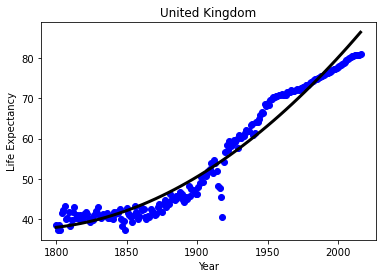

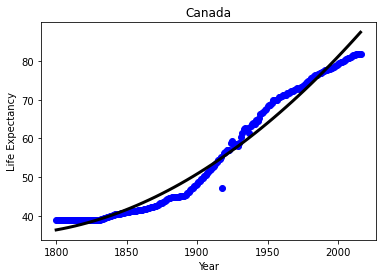

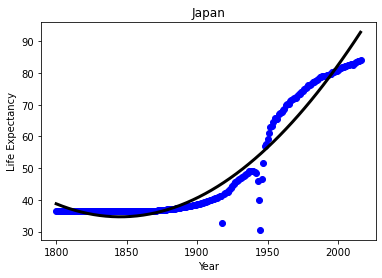

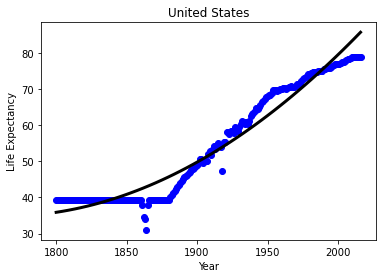

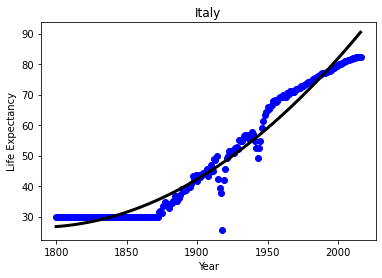


Country:  United Kingdom
MSE: 13.8547733684268
RMSE: 3.7222000709831278
R^2 Score: 0.9332251573784108

Country:  Canada
MSE: 6.744886320281439
RMSE: 2.597091896772511
R^2 Score: 0.9695501299026008

Country:  Japan
MSE: 17.991702970153646
RMSE: 4.241662760068703
R^2 Score: 0.9444772238959407

Country:  United States
MSE: 10.5110230891864
RMSE: 3.2420708026177345
R^2 Score: 0.9506167900139121

Country:  Italy
MSE: 23.15951125275004
RMSE: 4.812432986832133
R^2 Score: 0.9371647975364842


In [9]:
# PolynomialFeatures
poly = PolynomialFeatures(degree=2)
for country in countries:
    country_data = df[df['Entity'] == country]
    x = country_data['Year'].values.reshape(-1, 1)
    y = country_data['Life expectancy'].values.reshape(-1, 1)
    x_ = poly.fit_transform(x)
    reg.fit(x_, y)
    
    prediction_space = np.linspace(min(x), max(x)).reshape(-1,1)
    prediction_ = poly.fit_transform(prediction_space)
    plt.scatter(x, y, color='blue')
    plt.plot(prediction_space, reg.predict(prediction_), 
             color='black', linewidth=3)
    plt.title(country)
    plt.xlabel('Year')
    plt.ylabel('Life Expectancy')
    plt.show()

for country in countries:
    country_data = df[df['Entity'] == country]
    x = country_data['Year'].values.reshape(-1,1)
    y = country_data['Life expectancy'].values.reshape(-1,1)
    
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
    
    x_train_ = poly.fit_transform(x_train)
    x_test_ = poly.fit_transform(x_test)
    
    reg.fit(x_train_, y_train)
    
    y_pred = reg.predict(x_test_)
    
    print()
    print('Country: ', country)
    print('MSE:', mean_squared_error(y_test, y_pred))
    print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
    print('R^2 Score:', r2_score(y_test, y_pred))